In [2]:
import community 
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
# load the data into graph
df = pd.read_table("adj_allVillageRelationships_HH_vilno_68.csv",sep= ",",header= None)
M = df.as_matrix()
G=nx.from_numpy_matrix(M)

In [10]:
# detect the community and modularity
partition = community.best_partition(G)
community.modularity(partition, G)

0.3912189554419284

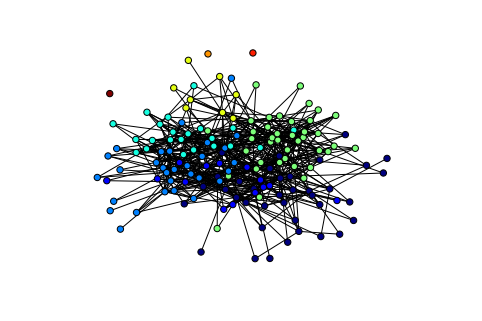

In [12]:
# plot differerent communities in differernt colors 
values = [partition.get(node) for node in G.nodes()]
nx.draw_spring(G, cmap = plt.get_cmap('jet'), node_color = values, node_size=40, with_labels=False)

One possible explaination of such structure of communities is caste. 

In [7]:
hh = pd.read_excel("household.xlsx")
hh = hh.loc[hh['village'] == 68]
hh

,village,adjmatrix_key,HHnum_in_village,hhid,hohreligion,castesubcaste,rooftype1,rooftype2,rooftype3,rooftype4,rooftype5,rooftypeoth,room_no,bed_no,electricity,latrine,ownrent,hhSurveyed,leader
12923,68,1,1,68001,1,SCHEDULE CASTE,0,1,0,0,0,NaN,2,0,2.0,3.0,1.0,0,0
12924,68,2,2,68002,1,SCHEDULE CASTE,0,1,0,0,0,NaN,3,0,1.0,3.0,1.0,1,0
12925,68,3,3,68003,1,SCHEDULE CASTE,0,0,0,1,0,NaN,3,0,1.0,3.0,1.0,0,0
12926,68,4,4,68004,1,SCHEDULE CASTE,0,1,0,0,0,NaN,3,0,2.0,3.0,1.0,1,0
12927,68,5,5,68005,1,SCHEDULE CASTE,0,1,0,0,0,NaN,2,0,2.0,3.0,5.0,1,0
12928,68,6,6,68006,1,SCHEDULE CASTE,0,1,0,0,0,NaN,2,0,2.0,3.0,1.0,0,0
12929,68,7,7,68007,1,SCHEDULE CASTE,0,1,0,0,0,NaN,1,0,3.0,3.0,1.0,0,0
12930,68,8,8,68008,1,SCHEDULE CASTE,0,0,0,1,0,NaN,2,0,2.0,3.0,1.0,1,0
12931,68,9,9,68009,1,SCHEDULE CASTE,0,1,0,0,0,NaN,3,0,2.0,3.0,1.0,0,0
12932,68,10,10,68010,1,SCHEDULE CASTE,0,1,0,0,0,NaN,1,0,2.0,3.0,1.0,0,0


In [31]:
caste = list(hh["castesubcaste"])
for i in range(len(caste)):
    if caste[i]== 'SCHEDULE CASTE':
        caste[i] = 0
    elif caste[i] == 'GENERAL':
        caste[i] = 1
    else: caste[i] = 2

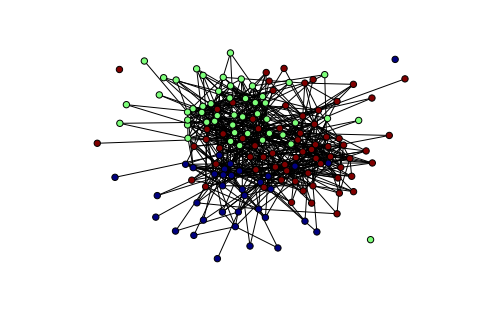

In [33]:
# re-draw the graph and set node color according to caste
nx.draw_spring(G, cmap = plt.get_cmap('jet'), node_color = caste, node_size=40, with_labels=False)

We can see the pattern is a little bit similiar with the previous one. Households belonging to the same caste are more likely forming the community. 